In [4]:
import os
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/SIR/'
os.chdir(working_dir)

In [5]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy import stats

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rc('text', usetex=False)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

In [6]:
import shutil

dirs = []
for d in os.listdir():
    if '__complete' in d:
        dirs.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
        
print(dirs)


['seed_18__mode_peak_number__complete', 'seed_12__mode_peak_number__complete', 'seed_17__mode_peak_number__complete', 'seed_19__mode_peak_number__complete', 'seed_16__mode_peak_number__complete', 'seed_13__mode_peak_number__complete', 'seed_10__mode_peak_number__complete', 'seed_15__mode_peak_number__complete', 'seed_14__mode_peak_number__complete', 'seed_11__mode_peak_number__complete']


In [7]:
check if the uncertainty is well calibrated

A MSE vs computational cost plot

SyntaxError: invalid syntax (388896487.py, line 1)

In [10]:

dir_num = len(dirs)

Nx_array = jnp.arange(5, 60, 10)
# Nx_array = jnp.array([5, 10, 20])

Ny_array = jnp.arange(5, 60, 10)

MSE_dict = {}

for Nx in Nx_array:
    MSE_dict_temp = {}
    
    MSE_dict_temp['BMC mean'] = []
    MSE_dict_temp['BMC se'] = []
    MSE_dict_temp['LSMC mean'] = []
    MSE_dict_temp['LSMC se'] = []
    MSE_dict_temp['IS mean'] = []
    MSE_dict_temp['IS se'] = []
    MSE_dict_temp['KMS mean'] = []
    MSE_dict_temp['KMS se'] = []
    
    for Ny in Ny_array:
        mse_BMC = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_BMC[l] = dict_all['BMC']
            
        MSE_dict_temp['BMC mean'].append(mse_BMC.mean())
        MSE_dict_temp['BMC se'].append(scipy.stats.sem(mse_BMC))
        
        mse_LSMC = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_LSMC[l] = dict_all['LSMC']
            
        MSE_dict_temp['LSMC mean'].append(mse_LSMC.mean())
        MSE_dict_temp['LSMC se'].append(scipy.stats.sem(mse_LSMC))
        
        mse_IS = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_IS[l] = dict_all['IS']
            
        MSE_dict_temp['IS mean'].append(mse_IS.mean())
        MSE_dict_temp['IS se'].append(scipy.stats.sem(mse_IS))
        
        mse_KMS = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_KMS[l] = dict_all['KMS']
            
        MSE_dict_temp['KMS mean'].append(mse_KMS.mean())
        MSE_dict_temp['KMS se'].append(scipy.stats.sem(mse_KMS))
        

    MSE_dict_temp['BMC mean'] = np.array(MSE_dict_temp['BMC mean'])
    MSE_dict_temp['BMC se'] = np.array(MSE_dict_temp['BMC se'])
    
    MSE_dict_temp['LSMC mean'] = np.array(MSE_dict_temp['LSMC mean'])
    MSE_dict_temp['LSMC se'] = np.array(MSE_dict_temp['LSMC se'])    
    
    MSE_dict_temp['IS mean'] = np.array(MSE_dict_temp['IS mean'])
    MSE_dict_temp['IS se'] = np.array(MSE_dict_temp['IS se'])
    
    MSE_dict_temp['KMS mean'] = np.array(MSE_dict_temp['KMS mean'])
    MSE_dict_temp['KMS se'] = np.array(MSE_dict_temp['KMS se'])
    
    MSE_dict[f"{Nx}"] = MSE_dict_temp
    


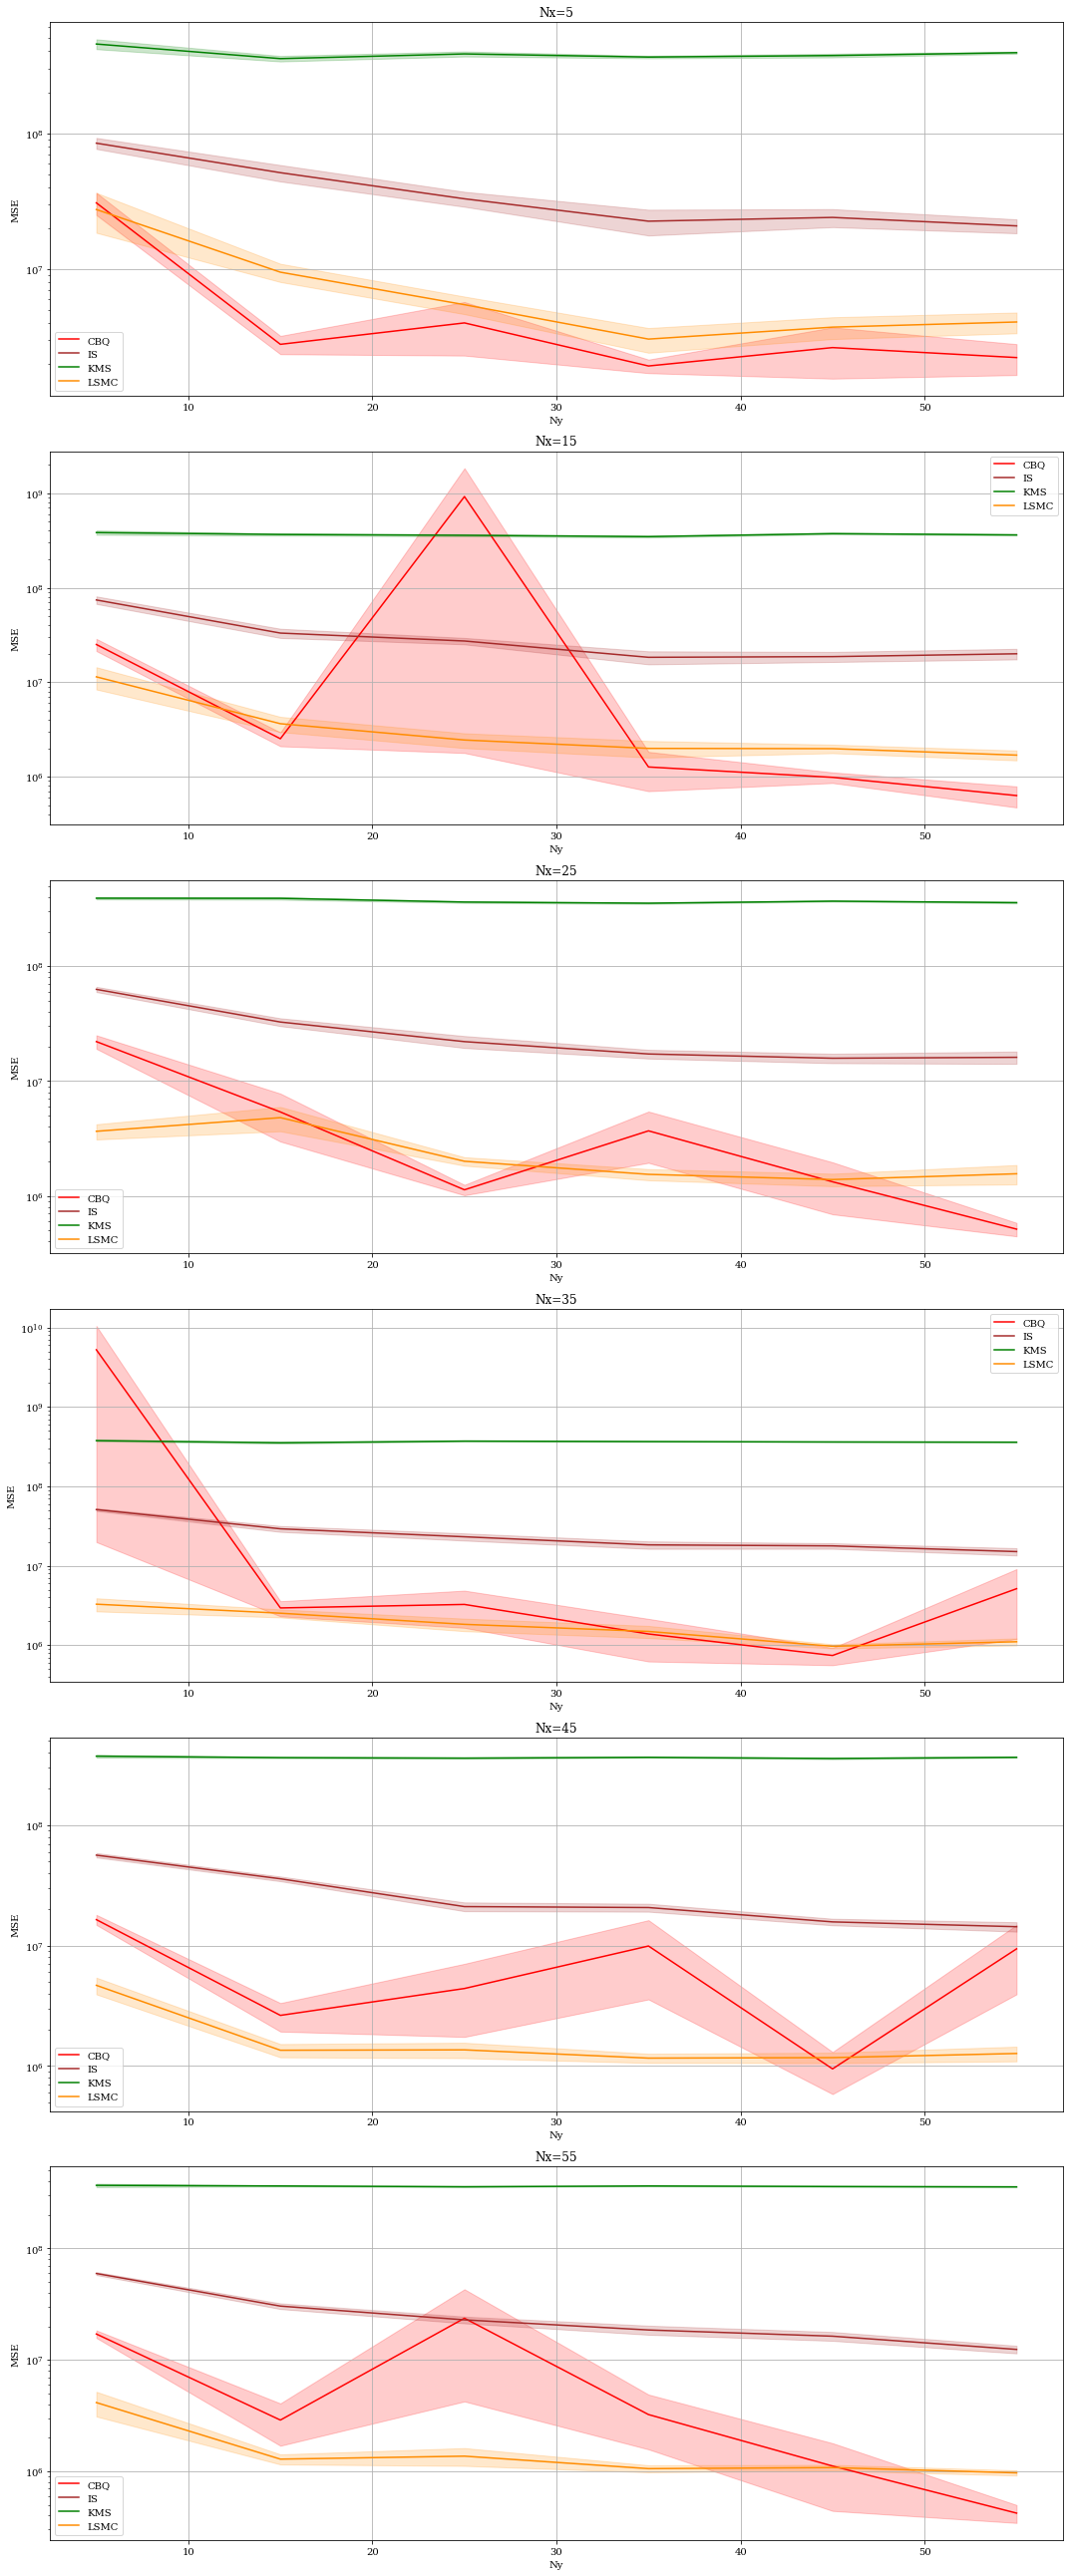

In [11]:
fig, axs = plt.subplots(len(Nx_array), 1, figsize=(15, len(Nx_array) * 6))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['BMC mean'] - MSE_dict[f"{Nx}"]['BMC se'], 
                        MSE_dict[f"{Nx}"]['BMC mean'] + MSE_dict[f"{Nx}"]['BMC se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['IS mean'] - MSE_dict[f"{Nx}"]['IS se'], 
                        MSE_dict[f"{Nx}"]['IS mean'] + MSE_dict[f"{Nx}"]['IS se'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['KMS mean'] - MSE_dict[f"{Nx}"]['KMS se'], 
                        MSE_dict[f"{Nx}"]['KMS mean'] + MSE_dict[f"{Nx}"]['KMS se'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['LSMC mean'] - MSE_dict[f"{Nx}"]['LSMC se'], 
                        MSE_dict[f"{Nx}"]['LSMC mean'] + MSE_dict[f"{Nx}"]['LSMC se'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.tight_layout()
plt.show()

In [13]:

dir_num = len(dirs)
# Nx_array = [5, 10, 20, 30]
Nx_array = jnp.arange(5, 60, 10)
# Ny_array = np.arange(3, 100, 3)
Ny_array = jnp.arange(5, 60, 10)

MSE_dict = {}
Time_dict = {}


for Nx in Nx_array:
    Time_dict_temp = {}
    
    Time_dict_temp['BMC mean'] = []
    Time_dict_temp['BMC se'] = []
    Time_dict_temp['LSMC mean'] = []
    Time_dict_temp['LSMC se'] = []
    Time_dict_temp['IS mean'] = []
    Time_dict_temp['IS se'] = []
    Time_dict_temp['KMS mean'] = []
    Time_dict_temp['KMS se'] = []
    
    for Ny in Ny_array:
        time_BMC = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_BMC[l] = dict_all['BMC']
            
        Time_dict_temp['BMC mean'].append(time_BMC.mean())
        Time_dict_temp['BMC se'].append(scipy.stats.sem(time_BMC))
        
        time_LSMC = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_LSMC[l] = dict_all['LSMC']
            
        Time_dict_temp['LSMC mean'].append(time_LSMC.mean())
        Time_dict_temp['LSMC se'].append(scipy.stats.sem(time_LSMC))
        
        time_IS = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_IS[l] = dict_all['IS']
            
        Time_dict_temp['IS mean'].append(time_IS.mean())
        Time_dict_temp['IS se'].append(scipy.stats.sem(time_IS))
        
        time_KMS = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_KMS[l] = dict_all['KMS']
            
        Time_dict_temp['KMS mean'].append(time_KMS.mean())
        Time_dict_temp['KMS se'].append(scipy.stats.sem(time_KMS))
        

    Time_dict_temp['BMC mean'] = np.array(Time_dict_temp['BMC mean'])
    Time_dict_temp['BMC se'] = np.array(Time_dict_temp['BMC se'])
    
    Time_dict_temp['LSMC mean'] = np.array(Time_dict_temp['LSMC mean'])
    Time_dict_temp['LSMC se'] = np.array(Time_dict_temp['LSMC se'])    
    
    Time_dict_temp['IS mean'] = np.array(Time_dict_temp['IS mean'])
    Time_dict_temp['IS se'] = np.array(Time_dict_temp['IS se'])
    
    Time_dict_temp['KMS mean'] = np.array(Time_dict_temp['KMS mean'])
    Time_dict_temp['KMS se'] = np.array(Time_dict_temp['KMS se'])
    
    Time_dict[f"{Nx}"] = Time_dict_temp
    


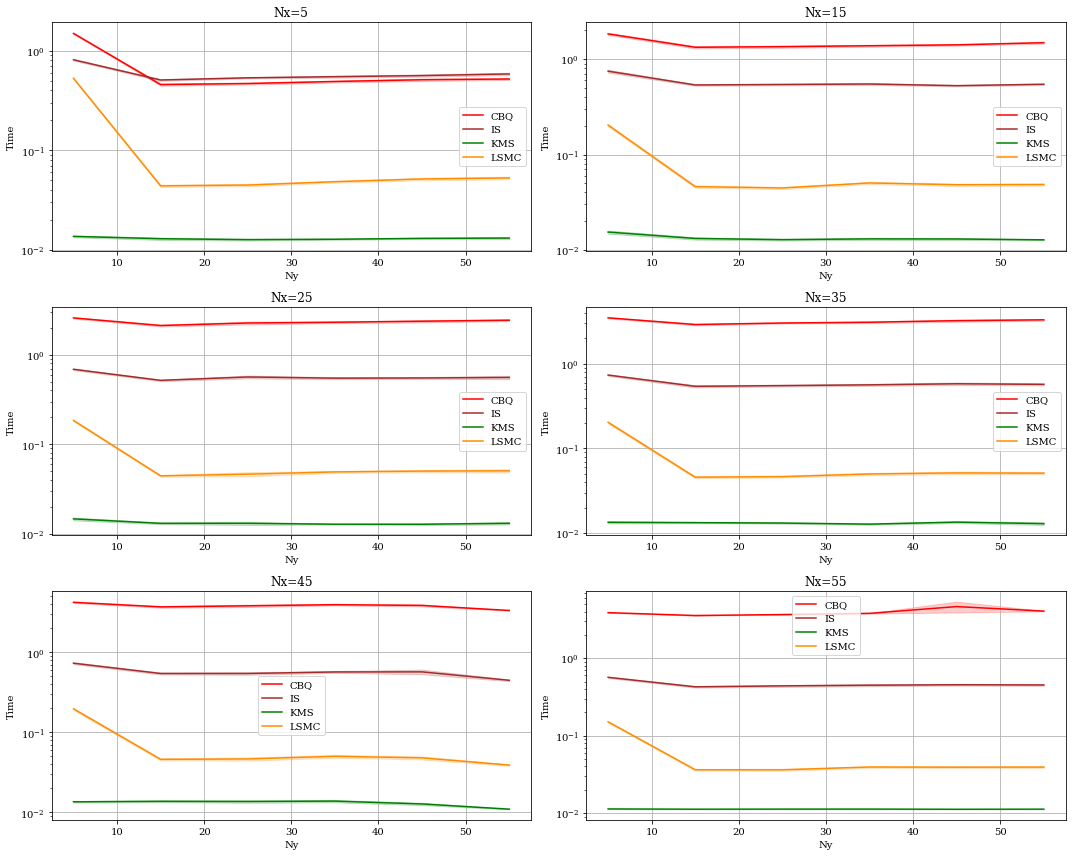

In [14]:
fig, axs = plt.subplots(int(len(Nx_array) / 2), 2, figsize=(15, len(Nx_array) * 2))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['BMC mean'] - Time_dict[f"{Nx}"]['BMC se'], 
                        Time_dict[f"{Nx}"]['BMC mean'] + Time_dict[f"{Nx}"]['BMC se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['IS mean'] - Time_dict[f"{Nx}"]['IS se'], 
                        Time_dict[f"{Nx}"]['IS mean'] + Time_dict[f"{Nx}"]['IS se'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['KMS mean'] - Time_dict[f"{Nx}"]['KMS se'], 
                        Time_dict[f"{Nx}"]['KMS mean'] + Time_dict[f"{Nx}"]['KMS se'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['LSMC mean'] - Time_dict[f"{Nx}"]['LSMC se'], 
                        Time_dict[f"{Nx}"]['LSMC mean'] + Time_dict[f"{Nx}"]['LSMC se'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Time')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.tight_layout()
plt.show()

In [17]:
import os
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/finance/'
os.chdir(working_dir)

# import shutil

# dirs = []
# for d in os.listdir():
#     if '__complete' in d:
#         dirs.append(f'finance/{d}')
#     else:
#         try:
#             shutil.rmtree(d)
#         except:
#             pass

# working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/finance_stein/'
# os.chdir(working_dir)

# stein_dirs = []
# for d in os.listdir():
#     if '__complete' in d:
#         stein_dirs.append(f'finance_stein/{d}')
#     else:
#         try:
#             shutil.rmtree(d)
#         except:
#             pass
        
# print(dirs)
# print(stein_dirs)
# working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/'
# os.chdir(working_dir)

In [18]:
large_Nx_array = [1000]
large_Ny_array = [1000]

for Nx in large_Nx_array:
    for Ny in large_Ny_array:
        time_KMS_large = np.zeros(dir_num)
        time_LSMC_large = np.zeros(dir_num)
        mse_KMS_large = np.zeros(dir_num)
        mse_LSMC_large = np.zeros(dir_num)

        for l, d in enumerate(dirs):
            with open(f"{d}/time_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                time_KMS_large[l] = dummy_dict['KMS']
                time_LSMC_large[l] = dummy_dict['LSMC']
            
            with open(f"{d}/mse_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                mse_KMS_large[l] = dummy_dict['KMS']
                mse_LSMC_large[l] = dummy_dict['LSMC']

                
print('===== MSE =====')
print(f'KMS with large samples has MSE {mse_KMS_large.mean()}')
print(f'LSMC with large samples has MSE {mse_LSMC_large.mean()}')

print('===== Time =====')
print(f'KMS with large samples has Time {time_KMS_large.mean()}')
print(f'LSMC with large samples has Time {time_LSMC_large.mean()}')


FileNotFoundError: [Errno 2] No such file or directory: 'seed_1681245628__mode_peak_number__complete/time_dict_X_1000_y_1000'